In [1]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
%matplotlib inline     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Carregando o dataset
df = pd.read_csv("dados_limitecredito.csv")  

In [3]:
# Verificando o formato dos dados
df.shape

(14, 6)

In [4]:
# Verificando as primeiras linhas do dataset
df.head(19)

,ID,historico_credito,divida,garantias,renda,Risco
0,1,1,2,1,10000,3
1,2,2,2,1,28000,3
2,3,2,1,1,29000,2
3,4,2,1,1,38900,3
4,5,2,1,1,40000,1
5,6,2,1,2,40000,1
6,7,1,1,1,12000,3
7,8,1,1,2,43222,2
8,9,3,1,1,56000,1
9,10,3,2,2,45600,1


In [5]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [6]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=20):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

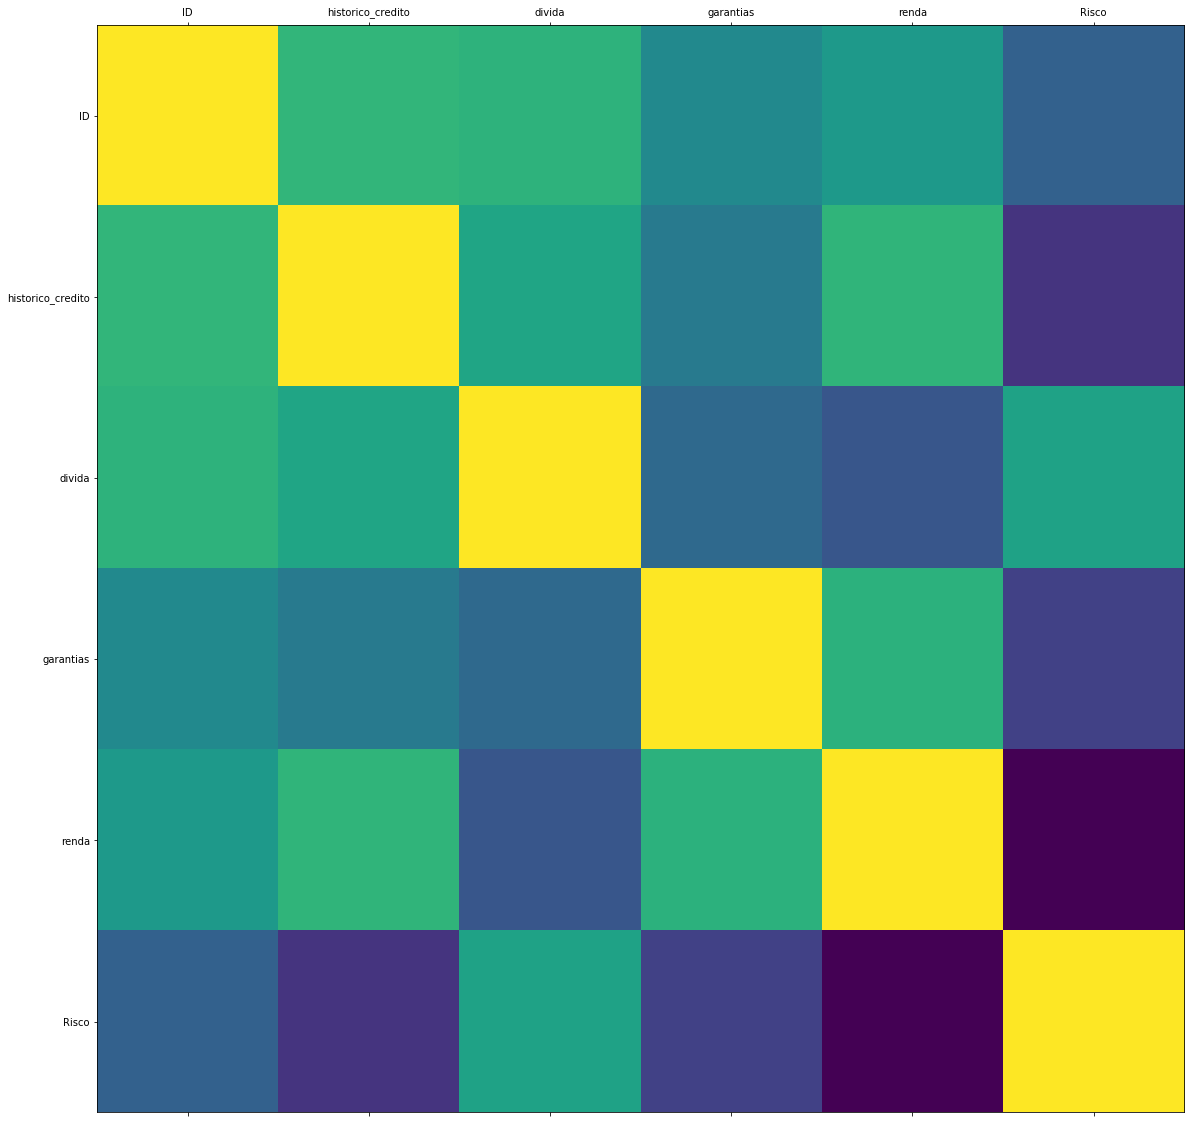

In [7]:
# Criando o gráfico
plot_corr(df)

In [10]:
# Verificando como os dados estão distribuídos
num_baixo = len(df.loc[df['Risco'] == 1])
num_medio = len(df.loc[df['Risco'] == 2])
num_alto = len(df.loc[df['Risco'] == 3])
print("Número de Casos Baixos     : {0} ({1:2.2f}%)".format(num_baixo, (num_baixo/ (num_baixo + num_medio + num_alto)) * 100))
print("Número de Casos Médios     : {0} ({1:2.2f}%)".format(num_false, (num_medio/ (num_baixo + num_medio + num_alto)) * 100))
print("Número de Casos Altos     : {0} ({1:2.2f}%)".format(num_false, (num_alto/ (num_baixo + num_medio + num_alto)) * 100))

Número de Casos Baixos     : 5 (35.71%)
Número de Casos Médios     : 0 (21.43%)
Número de Casos Altos     : 0 (42.86%)


In [ ]:
# Seleção de variáveis (Feature Selection)
features = ['sangue', 'bota_ovo', 'voa', 'mora_agua']
feature_pred = ['classificacao']

In [ ]:
# Criando objetos
X = df[features].values
Y = df[feature_pred].values

In [ ]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

In [ ]:
#Verificando Split
print("Original Verdadeiro : {0} ({1:0.2f}%)".format(len(df.loc[df['classificacao'] == 1]), 
                                               (len(df.loc[df['classificacao'] ==1])/len(df.index) * 100)))

print("Original Falso : {0} ({1:0.2f}%)".format(len(df.loc[df['classificacao'] == 0]), 
                                               (len(df.loc[df['classificacao'] == 0])/len(df.index) * 100)))
print("")
print("Training Verdadeiro : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training Falso : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test Verdadeiro : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test Falso : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

# Naive Bayes

In [ ]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

In [ ]:
#Verificando exatidão no modelo nos dados de treino
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

In [ ]:
#Verificando exatidão no modelo nos dados de teste
nb_predict_test = modelo_v1.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

# RandomForest

In [ ]:
#Utilizando RandomForest
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

# SVM

In [ ]:
#Utilizando SVM
modelo_v3 = svm.LinearSVC()

In [ ]:
modelo_v3.fit(X_treino, Y_treino.ravel()) 

In [ ]:
# Verificando os dados de treino
clf_predict_train = modelo_v3.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, clf_predict_train)))

In [ ]:
# Verificando nos dados de teste
clf_predict_test = modelo_v3.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, clf_predict_test)))
print()

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, clf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, clf_predict_test, labels = [1, 0]))

In [ ]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 1.0000
# Modelo usando algoritmo Random Forest       = 1.0000
# Modelo usando algoritmo SVM                 = 1.0000